In [38]:
%pip install soundfile
%pip install matplotlib
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def read_wav(file_path):
    sample_rate, data = wavfile.read(file_path)
    return sample_rate, data

def normalize(data):
    return data / np.max(np.abs(data))

def compute_mse(data1, data2):
    return np.mean((data1 - data2) ** 2)

def plot_waveforms(data1, data2, sample_rate, title1='DAW Output', title2='Python Library Output'):
    time = np.arange(data1.shape[0]) / sample_rate
    plt.figure(figsize=(14, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time, data1, label=title1)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(time, data2, label=title2)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [40]:
# Paths to your audio files
daw_output_path = './.playground/rp-op.wav'  # or .wav
python_output_path = './.playground/py-op.wav'  # or .wav

# Read the audio files
sample_rate_daw, daw_data = read_wav(daw_output_path)
sample_rate_py, py_data = read_wav(python_output_path)

# Ensure the sample rates are the same
assert sample_rate_daw == sample_rate_py, "Sample rates do not match!"

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_34952\324035324.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


Mean Squared Error (MSE): 2.3460275343256157e-09


C:\Users\Yogesh\AppData\Local\Temp\ipykernel_34952\324035324.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


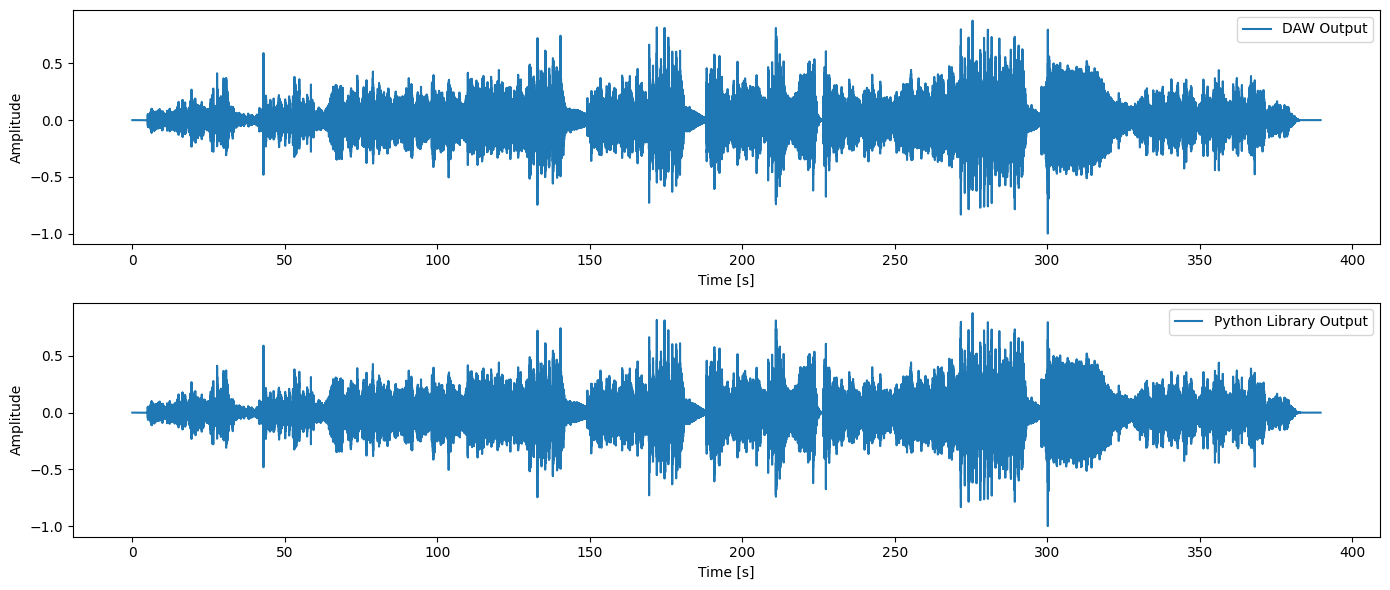

In [41]:
# Normalize the data
daw_data_norm = normalize(daw_data)
py_data_norm = normalize(py_data)

# Compute MSE
mse = compute_mse(daw_data_norm, py_data_norm)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the waveforms
plot_waveforms(daw_data_norm, py_data_norm, sample_rate_daw)
